In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # to normalise the data
from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

In [51]:
X = pd.DataFrame(X)
y = pd.Series(y)

n, p = X.shape

In [53]:
K = y.unique().size # number of classes


In [52]:
Xy = pd.concat([X, y], axis = 1)

In [54]:
LDAclassifier = LinearDiscriminantAnalysis()
LDAclassifier.fit(X, y)


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [59]:
y_predicted = pd.Series(LDAclassifier.predict(X))

In [57]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [60]:
y_predicted.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

In [63]:
#proportion of correctly classified observations
sum(y_predicted == y)/n

1.0

In [68]:
LDAclassifier.coef_.shape


(3, 13)

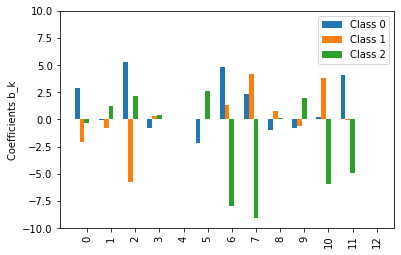

In [69]:
#plotting coefficients b_k for each class
width = 0.2
plt.figure()
for k in np.arange(3):    
    plt.bar(np.arange(0,13)+width*k,LDAclassifier.coef_[k,:], tick_label=X.keys(), width=width)
    plt.xticks(rotation='vertical')
    plt.ylim([-10,10])
    plt.ylabel('Coefficients b_k')    
plt.legend(['Class 0', 'Class 1', 'Class 2']);

In [73]:
pca = PCA(n_components=2)
temp = pca.fit(X)

projections = temp.transform(X)
projections.shape

(178, 2)

We can see in the plot below that PCA for  unnormalized observations doesn't work well becuase too much emphasis on the first component

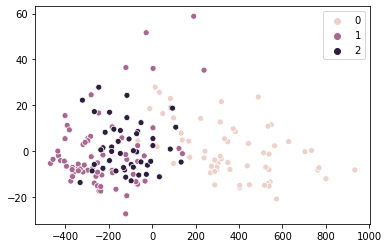

In [76]:
plt.figure()
sns.scatterplot(projections[:, 0], projections[:, 1], hue = y)

Dimensionality reduction with unnormalized data

In [77]:
LDAclassifier2 = LinearDiscriminantAnalysis(n_components = 2)
LDAclassifier2.fit(X, y)


LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [78]:
X_2 = LDAclassifier2.transform(X)

In [80]:
X_2 = pd.DataFrame(data = X_2)

In [82]:
X_2.head()

,0,1
0,-4.700244,1.979138
1,-4.301958,1.170413
2,-3.420720,1.429101
3,-4.205754,4.002871
4,-1.509982,0.451224


Here we see that LDA dimensionality reduction works extremely well even with unnormalized data

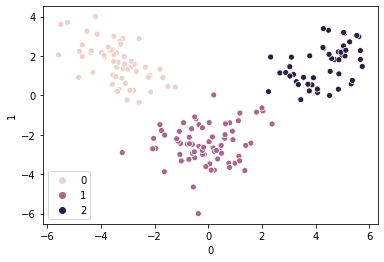

In [84]:
plt.figure()
sns.scatterplot(X_2[0], X_2[1], hue = y)

Here we try LDA with normalized columns

In [85]:
# Normalise the data (so that the values b_{kj} are on the same scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
# LDA
ldaclf = LinearDiscriminantAnalysis(store_covariance=True)
ldaclf.fit(X_scaled, y) # Train LDA

# lda.score returns the accuracy, that is 1-misclassification error=1-Risk
R_train = 1-ldaclf.score(X_scaled, y)
print('Training risk: ', R_train)

Training risk:  0.0


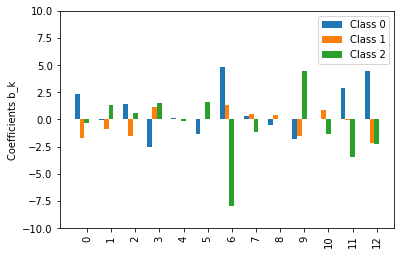

In [87]:
# Visualise the coefficients b_{kj} for k=0..3, j=0..12
width = 0.2
plt.figure()
for k in np.arange(3):    
    plt.bar(np.arange(0,13)+width*k,ldaclf.coef_[k,:], tick_label=X.keys(), width=width)
    plt.xticks(rotation='vertical')
    plt.ylim([-10,10])
    plt.ylabel('Coefficients b_k')    
plt.legend(['Class 0', 'Class 1', 'Class 2']);

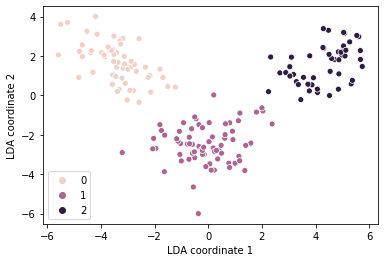

In [88]:
# Compute discriminant coordinates
Z = ldaclf.transform(X_scaled) 

# Plot data in discriminant coordinates
plt.figure()
sns.scatterplot(x=Z[:,0], y=Z[:,1], hue=y)
plt.xlabel('LDA coordinate 1')
plt.ylabel('LDA coordinate 2');